In [1]:
%run NB_Header.ipynb # Load general libs

## 0. Data exploration

In [2]:
df_raw_data = pd.read_csv('sample_data.csv')
display(df_raw_data.shape)

ds_dtypes = df_raw_data.dtypes
ds_dtypes.sort_values()

df_raw_data._get_numeric_data().dtypes #drop non-numeric cols

ds_dtypes[ds_dtypes=="float64"].index.tolist()

df_raw_data.describe(include='all')# .transpose() #['count']

(7706, 37)

In [ ]:
df_raw_data[df_raw_data.art.isna()]

### Variance scan

In [14]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

In [ ]:
thres_var = 1E-4 # (0.01%)
features = ds_dtypes[ds_dtypes=="float64"].index.tolist()
sel_var_thres = selector.fit(df_raw_data[features])
# sorted(zip(features,sel_var_thres.variances_), key=lambda x: x[1])
# features_selected = [feat for feat, var in zip(features, sel_var_thres.variances_) if var >= thres_var]

In [18]:
# Low variance features may consider to drop. Yet need to check on their business meaning/importance
thres_var = 0.05
for feat, var in zip(features, sel_var_thres.variances_):
    if var < thres_var:
        print('{}\t{:.3f}'.format(feat, var))

### Multicollinearity check

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

l_keep = ['n_area', 'n_completes', 'n_clicks', 'n_session'] # 'n_act',
calc_vif(df_raw_data[l_keep].dropna())

In [34]:
calc_vif(df_raw_data._get_numeric_data().dropna().drop(['parentid','userid','free_trial','tot_ts_mins'],axis=1))

,variables,VIF
0,postal_code,3.7
1,age,7.5
2,n_act,14.8
3,n_area,14.0
4,n_session,3.7
5,n_completes,7.6
6,n_clicks,7.8
7,shopped,2.1
8,art,2.6
9,books,3.6


In [33]:
# Colinearity - bivariate 
df_raw_data._get_numeric_data().dropna().drop(['parentid','userid','free_trial'],axis=1).corr()

,postal_code,age,n_act,n_area,n_session,n_completes,n_clicks,tot_ts_mins,shopped,art,books,game,learn_music,puzzles,song_chants,abcmtv,about_me,aquarium_hamster,clsrm_subj,learn_at_home,library,mastery_math,mastery_reading,nav,pet_park,shopping,zoo_farm_theater
postal_code,1.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
age,0.1,1.0,0.1,0.2,-0.0,0.0,0.1,0.1,0.2,0.1,0.1,0.1,0.1,-0.0,-0.0,-0.0,0.1,0.1,0.0,-0.0,0.1,0.0,0.0,0.0,0.1,0.1,-0.0
n_act,0.0,0.1,1.0,0.5,0.3,0.6,0.5,0.6,0.4,0.5,0.3,0.4,0.3,0.4,0.2,0.1,0.3,0.3,0.2,0.1,0.1,0.1,0.1,0.2,0.2,0.1,0.2
n_area,0.0,0.2,0.5,1.0,0.4,0.4,0.7,0.6,0.5,0.3,0.3,0.3,0.2,0.2,0.1,0.2,0.4,0.4,0.3,0.1,0.2,0.2,0.2,0.3,0.3,0.3,0.2
n_session,0.0,-0.0,0.3,0.4,1.0,0.3,0.4,0.6,0.2,0.2,0.2,0.3,0.3,0.2,0.1,0.1,0.2,0.3,0.3,0.1,0.1,0.1,0.2,0.5,0.1,-0.0,0.2
n_completes,0.0,0.0,0.6,0.4,0.3,1.0,0.6,0.8,0.3,0.6,0.5,0.6,0.3,0.5,0.3,0.1,0.3,0.3,0.3,0.1,0.2,0.2,0.1,0.2,0.2,0.2,0.2
n_clicks,0.0,0.1,0.5,0.7,0.4,0.6,1.0,0.8,0.5,0.5,0.4,0.4,0.3,0.3,0.2,0.2,0.5,0.6,0.3,0.1,0.2,0.2,0.1,0.4,0.4,0.3,0.3
tot_ts_mins,0.0,0.1,0.6,0.6,0.6,0.8,0.8,1.0,0.4,0.6,0.5,0.6,0.4,0.4,0.2,0.2,0.5,0.6,0.4,0.1,0.3,0.3,0.3,0.6,0.4,0.2,0.3
shopped,0.0,0.2,0.4,0.5,0.2,0.3,0.5,0.4,1.0,0.3,0.2,0.2,0.2,0.1,0.1,0.1,0.4,0.4,0.2,0.0,0.1,0.1,0.1,0.2,0.3,0.3,0.1
art,0.0,0.1,0.5,0.3,0.2,0.6,0.5,0.6,0.3,1.0,0.3,0.3,0.2,0.4,0.2,0.0,0.3,0.3,0.3,0.0,0.1,0.1,0.1,0.2,0.2,0.2,0.2


### Two sample means null hypothesis test
+ https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/
+ https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

* Z-test to approximate t-test (n_sample > 30)

In [ ]:
from scipy.stats import norm, t

In [ ]:
ds_r1 = df_raw_data[df_raw_data.userid.isin(ds_returner)][attr]
ds_r1 = np.log(ds_r1[ds_r1>0])
ds_r2 = df_raw_data[~df_raw_data.userid.isin(ds_returner)][attr]
ds_r2 = np.log(ds_r2[ds_r2>0])
t_score = (ds_r1.mean() - ds_r2.mean())/np.sqrt(ds_r1.var()/ds_r1.size+ds_r2.var()/ds_r2.size)
p_value = norm.sf(abs(t_score))*2 #for two-sided p-value z test approx
# p_value = t.sf(abs(t_score), min(ds_r1.size, df_r2.size))*2 #for two-sided p-value t test with min(r1,r2) as dof

* Chi square (distrbution free) frequency test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [ ]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
# contingency table
table = [[10, 20, 30],
         [6,  9,  17]]
print(table)
stat, p, dof, expected = chi2_contingency(table)

# interpret test-statistic
from scipy.stats import chi2
prob = 0.95
critical = chi2.ppf(prob, dof)

* Power analysis

In [ ]:
# https://en.wikipedia.org/wiki/Power_of_a_test
# In the context of binary classification, the power of a test is called its statistical sensitivity, 
# its true positive rate (1 - alpha), or its probability of detection for avoiding type I error.

### Pre-processing & data standardization

#### Using pandas

In [38]:
# Separate model feature inputs into categorical and numeric types
l_category = ds_dtypes[ds_dtypes=='object'].index.tolist()
l_category.remove('which_day')
print('Category input -', l_category) 

l_numeric = [f for f in ds_dtypes[ds_dtypes!='object'].index if f not in ['parentid','userid','postal_code']]
print('Numeric input -', l_numeric)

Category input - ['subd', 'covid', 'payment_frequency_group', 'gender', 'path_level_grade', 'device']
Numeric input - ['free_trial', 'age', 'n_act', 'n_area', 'n_session', 'n_completes', 'n_clicks', 'tot_ts_mins', 'shopped', 'art', 'books', 'game', 'learn_music', 'puzzles', 'song_chants', 'abcmtv', 'about_me', 'aquarium_hamster', 'clsrm_subj', 'learn_at_home', 'library', 'mastery_math', 'mastery_reading', 'nav', 'pet_park', 'shopping', 'zoo_farm_theater']


In [ ]:
# Apply one-hot conversion to categorical features and combine numeric features
response = 'is_returner'
df_dataset = df_raw_data[[response]+l_numeric]
df_dataset['free_trial'] = df_dataset['free_trial'].astype(int)
df_dataset = pd.concat([df_dataset, pd.get_dummies(df_raw_data[l_category], prefix=l_category)],axis=1)
# for cat in l_category:
#     df_dataset = pd.concat([df_dataset, pd.get_dummies(df_raw_data[cat], prefix=cat)],axis=1)
    
features = df_dataset.columns[1:].tolist()
df_dataset.fillna(0, inplace=True)

In [ ]:
# Get quantile counts
df_data.fillna('NA', inplace=True)
ds_biznm = df_data.businessname.value_counts()
ds_biznm.quantile(q=np.arange(0.9,1,0.01))

In [ ]:
# Bin operation
l_binsz=[0,1000,10_000,100_000,1_000_000,10_000_000,100_000_000,1_000_000_000]
df_raw_data.loc[:,'jval_bin'] = pd.cut(df_raw_data['job_value'].replace('NA',None), l_binsz, \
                                       include_lowest=True, labels=list(range(0,len(l_binsz)-1)))

df_raw_data.jval_bin.value_counts()

#### Using sklearn libs

In [ ]:
# https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/applications/porto_seguro_keras_under_sampling.html
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

def convert_float64(X):
    return X.astype(np.float64)

In [ ]:
numerical_columns = [name for name in X_train.columns
                     if '_calc_' in name and '_bin' not in name]
numerical_pipeline = make_pipeline(
    FunctionTransformer(func=convert_float64, validate=False),
    StandardScaler())

categorical_columns = [name for name in X_train.columns
                       if '_cat' in name]
categorical_pipeline = make_pipeline(
    SimpleImputer(missing_values=-1, strategy='most_frequent'),
    OneHotEncoder(categories='auto'))

preprocessor = ColumnTransformer(
    [('numerical_preprocessing', numerical_pipeline, numerical_columns),
     ('categorical_preprocessing', categorical_pipeline, categorical_columns)],
    remainder='drop')

## 1. Data modeling

### Plotting library

In [1]:
# Load graph libs
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator, FuncFormatter
import ptitprince as pt

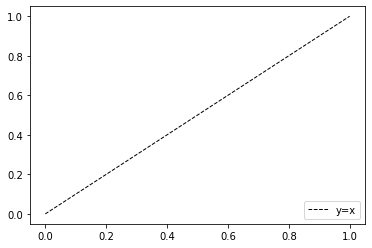

In [3]:
# Matplotlib df
ax = plt.subplot()
# performance_all(y_test, pred, pred_dnn, ax, color='r')
ax.plot([0,1], [0,1], color='k', linestyle='--', linewidth=1.0, label = 'y=x')
ax.legend(loc='lower right');

In [ ]:
# https://plotly.com/python/px-arguments/#input-data-as-pandas-dataframes
import plotly.express as px
df = px.data.iris()
# Use directly Columns as argument. You can use tab completion for this!
# fig = px.scatter(df, x=df.sepal_length, y=df.sepal_width, color=df.speciess, size=df.petal_length)
fig = px.scatter(df, x=df.sepal_length, y=[df.sepal_width, df.petal_width])
# fig = px.line(df, x="year", y="lifeExp", color='country')
fig.show()

In [ ]:
# https://plotly.com/python/line-charts/#line-plot-with-goscatter
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='red'),
                    name="ACC: {:.2f} AUC: {:.2f} REC: {:.2f}".format(acc, auc, rec)))
# fig.add_trace(go.Scatter(x=random_x, y=random_y1,
#                     mode='lines+markers',
#                     name='lines+markers'))
# fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                     mode='markers', name='markers'))

fig.update_layout(
        showlegend = True,
        title = dict(text='ROC Curve', x=0.42, y=0.9, xanchor='center', yanchor='top'),
        xaxis_title = "FPR",
        yaxis_title = "TPR",
        legend_title = "Model ",
        # font=dict(
        #     family="Courier New, monospace",
        #     size=18,
        #     color="RebeccaPurple"
        # )
        # xaxis = dict(
        #     tickmode = 'array',
        #     tickvals = df_summ_metric.index,
        # ),
        # xaxis_tickformat = '%d %b (%a)'
    )

fig.show()

In [ ]:
# Raincloud Plot for normal distribution - var: ATTR
plt.rcParams.update({'font.size': 12, 'figure.figsize': (15, 8)})
ax = pt.RainCloud(x='User Type',y=f'{attr.upper()} mins', alpha=0.75, pointplot=True,
             data = df_attr.stack().rename(f'{attr.upper()} mins').reset_index().rename(
             columns={'level_1':'User Type'}), orient='h')

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(True, ls=(0, (5, 5)), drawstyle='steps')
ax.set_xlim(0, 80);

### Interactive display

In [ ]:
# Interactive widget
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
# Decorator with function
@interact(ptype=df_LH_summ.index, attr=l_keep, logScale=[False,True])
def plot_interactive(ptype, attr, logScale):
#     # ptype = 'RSFR'
#     df_LH_attr = df_LH[df_LH.property_type==ptype].reset_index(drop=True)
#     df_others_attr = df_others[df_others.property_type==ptype].reset_index(drop=True)

#     # attr = 'loan_amount'
#     ds1 = df_LH_attr[attr]
#     ds2 = df_others_attr[attr]
#     if logScale:
#         df_attr = pd.DataFrame({'LendingHome':np.log10(ds1), 'Others':np.log10(ds2)})
#     else:
#         df_attr = pd.DataFrame({'LendingHome':ds1, 'Others':ds2})
#     # df_attr.head(3)

#     # Raincloud Plot for distribution - var: ATTR
#     ax = pt.RainCloud(x='Lender Type',y=f'{attr.upper()}', alpha=0.75, pointplot=True,
#                  data = df_attr.stack().rename(f'{attr.upper()}').reset_index().rename(
#                  columns={'level_1':'Lender Type'}), orient='h')

#     ax.xaxis.set_minor_locator(AutoMinorLocator(5))
#     ax.grid(True, ls=(0, (5, 5)), drawstyle='steps')
#     if not logScale:
#         ax.set_xlim(df_attr.Others.quantile(q=0.01), df_attr.Others.quantile(q=0.99))

### Clustering technique

In [ ]:
# Load Kmean clustering lib
from sklearn.cluster import KMeans
# Load Gaussian mixture model library
from sklearn import mixture

In [ ]:
# Perform clustering: Gaussian Mix Modeling (GMM) with selected non-trivial features
l_cluster = []
df_cluster = df_dataset[[response]]
X = df_dataset.drop(columns=[response]+list(set(features) - set(feature_score.keys())))
for n_center in range(3,7):
    cls = f'n_cluster_{n_center}'
    l_cluster.append(cls)
    
    # print('Number of center to cluster: {}'.format(n_center), flush=True) 
    # cmodel = KMeans(n_clusters=n_center, random_state=777)
    cmodel = mixture.GaussianMixture(n_components=n_center, random_state=777)
    print('Number of gaussian component to cluster: {}'.format(n_center), flush=True) 
    
    cmodel.fit(X) # go fitting    
    df_cluster.loc[:, cls] = cmodel.predict(X)+1 # classify each user
    
    # User count and return rate summary for each cluster
    # display(get_ret_rate(df_cluster, cls, response))

### Imbalance dataset - oversampling vs. undersampling
https://imbalanced-learn.readthedocs.io/en/stable/introduction.html

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

X = df_data[features]
y = df_data[response]

# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")
# Oversampled: Counter({0: 9844, 1: 4922})

# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")
# Combined Random Sampling: Counter({0: 6152, 1: 4922})

### Split dataset and k-fold for cross-validation

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(
    df_dataset[features], df_dataset[response], test_size=0.15, random_state=777)

In [ ]:
X_train = df_dataset[features]
y_train = df_dataset[response]

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=777)
for train_idx, valid_idx in kf.split(y_train):
    pass

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=777, shuffle=True)
for train_idx, valid_idx in skf.split(X_train, y_train):
    # Prepare train and valid set
    X_train_np = X_train.iloc[train_idx].values
    y_train_np = y_train.iloc[train_idx].values
    X_valid_np = X_train.iloc[valid_idx].values
    y_valid_np = y_train.iloc[valid_idx].values
    
    # X_local_train = preprocessor.fit_transform(X_train.iloc[train_idx])
    # y_local_train = y_train.iloc[train_idx].values.ravel()
    # X_local_test = preprocessor.transform(X_train.iloc[valid_idx])
    # y_local_test = y_train.iloc[valid_idx].values.ravel()


In [ ]:
# Model training setup
best_model = None
best_model_perf = {'ACC':0, 'REC':0}

acc_train, rec_train, _ = model_performance(model, X_train_np, y_train_np, 'Train')
acc_valid, rec_valid, _ = model_performance(model, X_valid_np, y_valid_np, 'Valid')

# check if better model
# acc_avg, rec_avg = 0.5*(acc_train+acc_valid), 0.5*(rec_train+rec_valid)
# if acc_avg > best_model_perf['ACC'] and rec_avg > best_model_perf['REC']:
if acc_valid > best_model_perf['ACC'] and rec_valid > best_model_perf['REC']:
    print('Found better model.')
    best_model = model
    best_model_perf = {'ACC':acc_valid, 'REC':rec_valid, 'fold':fold_indx}
    # best_model.save_model('ml-xgb-best_model.xgb')

print(f'Best model trained with performance at fold {best_model_perf["fold"]}:')
model_performance(model, X_train.values, y_train.values, 'Overall');

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=777)
clf_lr.fit(X_train, y_train)

In [ ]:
# feature coeff bar plot
l_sorted = sorted(zip(features_selected, clf_lr.coef_[0]), key=lambda x: x[1],reverse=True)
def plot_feature_importance(l_sorted, sig_lvl=1):
    plt.rcParams["figure.figsize"] = [15, 6]
    x_feat = [feat for feat, coef in l_sorted if abs(coef) > sig_lvl]
    y_feat = [coef for feat, coef in l_sorted if abs(coef) > sig_lvl]
    plt.bar(range(len(x_feat)), y_feat, align='center')
    _ = plt.xticks(range(len(x_feat)), x_feat, rotation=30)

### XGBoost Model
https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db

In [ ]:
import xgboost
from xgboost import XGBClassifier # XGBRegressor

clf = XGBClassifier(n_jobs=2, learning_rate=0.25, random_state=777, n_estimators=200) #silent=False,
model = clf.fit(X_train_local, y_train_local, \
             eval_set=[(X_valid_local, y_valid_local)], \
             early_stopping_rounds=10, verbose=False)
             # xgb_model= None) # if not best_model else best_model.get_booster())

In [ ]:
from collections import OrderedDict
feature_score = OrderedDict()
# Select features with non-trivial impact to the model (threshold=1)
for k,v in sorted(best_model.get_booster().get_fscore().items(), key=lambda x:x[1], reverse=True):
    if v > 1:
        feat = features[int(k[1:])]
        print(f'{k} - {feat} - {v}')
        feature_score[feat] = v

# xgboost.plot_importance(best_model, max_num_features=10);

### DNN - Tensorflow

In [ ]:
# Create DNN model using keras
input_vecs = Input(shape=(len(features),))
nn = layers.Dropout(0.5)(layers.Dense(128, activation='relu')(input_vecs))
nn = layers.BatchNormalization()(nn)
nn = layers.Dropout(0.5)(layers.Dense(64, activation='relu')(nn))
nn = layers.BatchNormalization()(nn)
nn = layers.Dense(16, activation='relu')(nn)
nn = layers.BatchNormalization()(nn)
nn = layers.Dense(4, activation='relu')(nn)
result = layers.Dense(2, activation='softmax')(nn)
# result = layers.Dense(1, activation='linear')(nn) # tanh
init_model = models.Model(input_vecs, result)
init_model.compile(optimizer='adam', loss='categorical_crossentropy')
# init_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
 # Go training!
best_model.fit(X_train_np, y_train_np, epochs=200, verbose=2,
    validation_data= (X_valid_np, y_valid_np), # class_weight={0:1, 1:2},
    batch_size=128,
    callbacks= [EarlyStopping(patience=4, verbose=1, mode='min', restore_best_weights=True)])

### DNN - pyTorch

In [ ]:
# PyTorch libs
import torch
import torch.nn as nn
# import torchvision
# import torchvision.transforms as transforms
import logging

# https://github.com/wavepak/torchsample.git
from torchsample.modules import ModuleTrainer
from torchsample.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
class DNN(nn.Module):
    def __init__(self, input_size):
        super(DNN, self).__init__()
        self.reluAct = nn.ReLU()
        self.dropOut = nn.Dropout(0.5)
        self.batchNorm_il = nn.BatchNorm1d(512)
        self.batchNorm_h1 = nn.BatchNorm1d(256)
        self.batchNorm_h2 = nn.BatchNorm1d(64)
        self.batchNorm_h3 = nn.BatchNorm1d(16)
        
        self.logSoftAct = nn.LogSoftmax(dim=1)
        # self.softAct = nn.Softmax()
        # self.sigmoid = nn.Sigmoid()
        
        self.input_layer = nn.Linear(input_size, 512)  # equivalent to Dense in keras
        self.hidden_layer1 = nn.Linear(512, 256)
        self.hidden_layer2 = nn.Linear(256, 64)
        self.hidden_layer3 = nn.Linear(64, 16)
        self.hidden_layer4 = nn.Linear(16, 4)
        self.output_layer = nn.Linear(4, 2)
    
    def forward(self, x):

        clsf = self.input_layer(x)
        clsf = self.dropOut(self.reluAct(clsf))
        clsf = self.batchNorm_il(clsf)
        
        clsf = self.hidden_layer1(clsf)
        clsf = self.dropOut(self.reluAct(clsf))
        clsf = self.batchNorm_h1(clsf)
        
        clsf = self.hidden_layer2(clsf)
        clsf = self.reluAct(clsf)
        clsf = self.batchNorm_h2(clsf)
                
        clsf = self.hidden_layer3(clsf)
        clsf = self.reluAct(clsf)
        clsf = self.batchNorm_h3(clsf)
                
        clsf = self.hidden_layer4(clsf)
        clsf = self.reluAct(clsf)
        
        clsf = self.output_layer(clsf)
        clsf = self.logSoftAct(clsf)
        
        return clsf
    
    def create_logger(self, logname='logger'):
        logger = logging.getLogger()
        fh = logging.FileHandler(logname+'.log')
        fh.setFormatter(logging.Formatter('%(asctime)s - %(levelname)s: %(message)s', '[%Y-%m-%d %H:%M:%S]'))
        logger.setLevel(logging.INFO)
        logger.addHandler(fh)
        return logging

In [ ]:
# https://github.com/ncullen93/torchsample/blob/master/examples/mnist_loader_example.py
model = DNN(len(features))
trainer = ModuleTrainer(model)

callbacks = [EarlyStopping(monitor='val_loss', patience=5), 
             ReduceLROnPlateau(factor=0.5, patience=3)]

# Negative Log Likelihood Loss (nll_loss)
# https://pytorch.org/docs/master/nn.functional.html#torch.nn.functional.nll_loss
trainer.compile(optimizer='adam', loss='nll_loss', callbacks=callbacks)

In [ ]:
# Go training!
best_model.model.train()
best_model.fit(X_train_ts, y_train_ts, val_data=(X_valid_ts, y_valid_ts), shuffle=True,
            num_epoch=200, batch_size=bsize, verbose=1)

### Time series

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
# df1=df.resample(freq='D', how=np.mean)
# test_stationarity(df1.Spend.dropna())
# test_stationarity(df1[‘Spend’].diff(1).dropna())

In [ ]:
# ACF and PACF plots
# from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(series, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, ax=plt.gca())
plt.show()

In [ ]:
import statsmodels.api as sm
fit1 = sm.tsa.statespace.SARIMAX(train.Spend, order=(7, 1, 2), seasonal_order=(0, 1, 2, 7)).fit(use_boxcox=True)
test['SARIMA'] = fit1.predict(start="2019-07-23", end="2019-09-23", dynamic=True)
plt.figure(figsize=(16, 8))
plt.plot(train['Spend'], label='Train')
plt.plot(test['Spend'], label='Test')
plt.plot(test['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
# Hot-Winters’ additive model 
from statsmodels.tsa.api import ExponentialSmoothing
fit1 = ExponentialSmoothing(np.asarray(train['Spend']) ,seasonal_periods=7 ,trend='add', seasonal='add').fit(use_boxcox=True)
test['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Spend'], label='Train')
plt.plot(test['Spend'], label='Test')
plt.plot(test['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

## 2. Model Evaluation

In [ ]:
# Regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def model_performance(model, X, y, dlabel):
    # Evalute model performance on dataset   
    pred = model.predict(X)
    r2 = r2_score(y, pred)
    rmse = np.sqrt(mean_squared_error(y, pred))
    mae = mean_absolute_error(y, pred)
    print(f'{dlabel} R2: {r2:.2f}\tRMSE: {rmse:.2f}\tMAE: {mae:.2f}')
    return r2, rmse, mae

In [ ]:
# Classification
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix, roc_curve # binary
def model_performance(model, X, y, dlabel):
    # Evalute model performance on dataset   
    pred = model.predict(X)
    acc = accuracy_score(y, pred)
    auc = roc_auc_score(y, pred)
    rec = recall_score(y, pred)
    print(f'{dlabel} ACC: {acc:.2f}\tREC: {rec:.2f}\tAUC: {auc:.2f}')
    return acc, auc, rec

In [ ]:
fpr, tpr, thr = roc_curve(y, pred_prob[:,1], pos_label=1)
ax.plot(fpr, tpr, color, label="ACC: {:.2f} AUC: {:.2f} REC: {:.2f}".format(acc, auc, rec))
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

In [ ]:
confusion_matrix(y_test, clf.predict(X_test)) # tn, fp, fn, tp

In [ ]:
# Multiclass case
acc = accuracy_score(y, np.argmax(pred, axis=1))
auc = roc_auc_score(pd.get_dummies(y), pred, multi_class='ovr', average='micro')
rec = recall_score(y, np.argmax(pred, axis=1), average='macro', labels=[0,1])